In [1]:
##Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
column_names = ["label", "message"]
data = pd.read_csv("train-data.tsv", names=column_names, sep="\t")
data.head()

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [3]:
data.describe()

,label,message
count,4179,4179
unique,2,3935
top,ham,"sorry, i'll call later"
freq,3619,22


In [4]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      3619   3430                             sorry, i'll call later   22
spam      560    505  hmv bonus special 500 pounds of genuine hmv vo...    3

In [5]:
#Calculating the lenght of all the messages
data['lenght']=data['message'].apply(len)
data.head()

,label,message,lenght
0,ham,ahhhh...just woken up!had a bad dream about u ...,146
1,ham,you can never do nothing,24
2,ham,"now u sound like manky scouse boy steve,like! ...",115
3,ham,mum say we wan to go then go... then she can s...,83
4,ham,never y lei... i v lazy... got wat? dat day ü ...,77


In [6]:
data.describe()

,lenght
count,4179.000000
mean,80.473798
std,60.286348
min,2.000000
25%,35.000000
50%,62.000000
75%,122.000000
max,910.000000


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

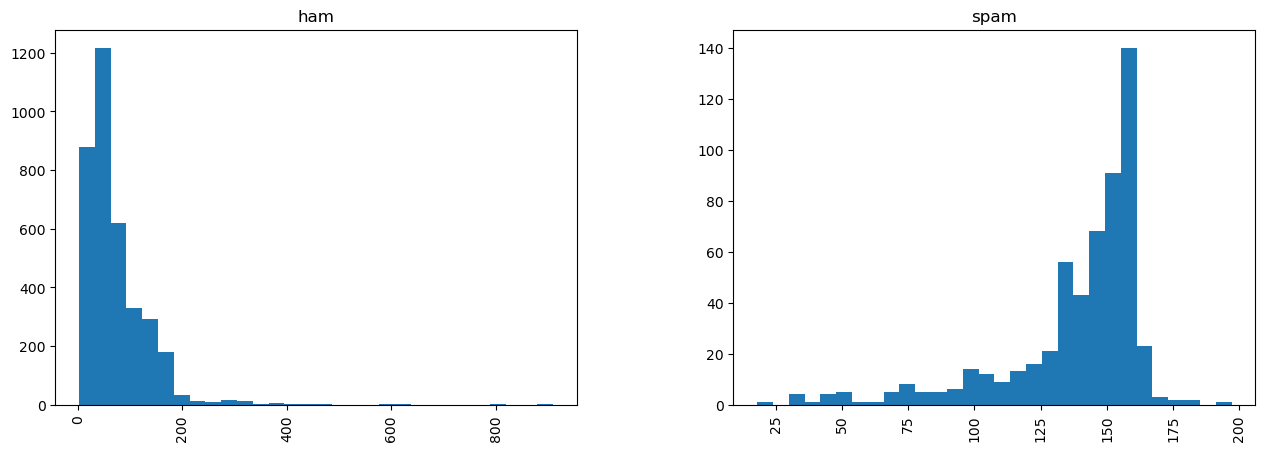

In [7]:
%matplotlib inline

#Plotting the lenght of ham and spam messages
data.hist(by='label',column='lenght',bins=30,figsize=[15,5]) 

<p>From this plot we can say that spam messages are much more long than ham messages on an average</p>


In [8]:
#Converting our labels to numeric labels
# ham = 0 and spam = 1
data['label_num']=data.label.map({'ham':0,'spam':1})
data.head()

,label,message,lenght,label_num
0,ham,ahhhh...just woken up!had a bad dream about u ...,146,0
1,ham,you can never do nothing,24,0
2,ham,"now u sound like manky scouse boy steve,like! ...",115,0
3,ham,mum say we wan to go then go... then she can s...,83,0
4,ham,never y lei... i v lazy... got wat? dat day ü ...,77,0


In [9]:
#loading our features and target to train
x = data.message
y = data.label_num


In [10]:
#Now we have 5572 labels for 5572 features
#spliting data into 75% test and 25% into train which is by default
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)


In [11]:
vect = CountVectorizer()
#converting features into numeric vector
X_train = vect.fit_transform(x_train)
#converting target into numeric vector
X_test = vect.transform(x_test)

In [12]:
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [13]:
#defining functions for training and testing data
def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)
    
    
#function for predicting labels
def predict(clf,X_test):
    return clf.predict(X_test)

In [14]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [15]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))
    

In [16]:
score_df=pd.DataFrame.from_records(score,columns=['scores'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['scores']*100
score_df

ValueError: 1 columns passed, passed data had 2 columns

In [ ]:
##Find out time taken by each classifier
##remove stopwords and train again
##use GridSearchCV to tune algorithms